MAE: 0.016274, RMSE: 0.021944


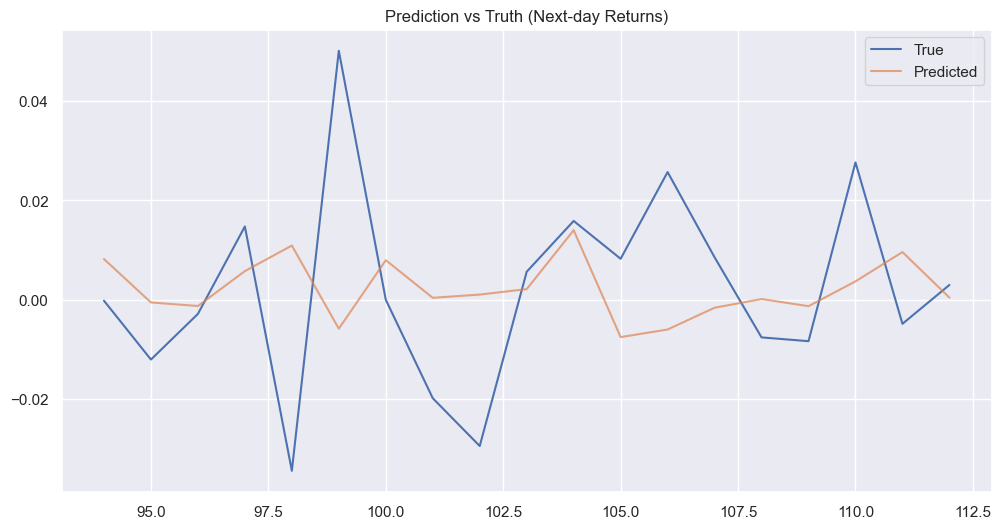

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


import sys
sys.path.append("../src")
from features import make_features


np.random.seed(7)
sns.set()
plt.rcParams['figure.figsize'] = (10, 5)

processed_dir = Path("../data/processed")
input_file = processed_dir / "seagate_no_outliers.csv"

df = pd.read_csv(input_file)
df = make_features(df, price_col="price", date_col="date")


df["y_next_ret"] = df["Return"].shift(-1)
df = df.dropna().copy()


cut = int(len(df) * 0.8)
train, test = df.iloc[:cut], df.iloc[cut:]


features = ["Return_Lag1", "Return_Lag2", "Return_Lag5", "MA_5", "MA_10", "Volatility_5"]
X_tr, X_te = train[features], test[features]
y_tr, y_te = train["y_next_ret"], test["y_next_ret"]


reg = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])


reg.fit(X_tr, y_tr)
pred = reg.predict(X_te)


rmse = mean_squared_error(y_te, pred) ** 0.5
mae = mean_absolute_error(y_te, pred)
print(f"MAE: {mae:.6f}, RMSE: {rmse:.6f}")


plt.figure(figsize=(12,6))
plt.plot(y_te.index, y_te, label="True")
plt.plot(y_te.index, pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Prediction vs Truth (Next-day Returns)")
plt.show()



### Feature Engineering  
We created lag and rolling mean features to capture short-term memory in returns. These features provide the model with basic temporal structure of the stock returns.  

### Model Performance  
The Linear Regression baseline shows limited predictive power.  
MAE and RMSE are relatively small, but predictions tend to be smoother than actual returns.  

### What Works and What Fails  
- **Works:** Lag features add useful information about direction of returns.  
- **Fails:** The linear model cannot capture volatility clusters or sudden jump shocks, leading to underfitting.  

### Next Steps  
- Add additional rolling volatility and higher-order lag features.  
- Experiment with non-linear models (e.g., tree-based methods such as Random Forests).  
- Explore models tailored for time series forecasting (e.g., ARIMA, LSTM).  
